<a href="https://colab.research.google.com/github/Airport237/image2sphere/blob/main/S2S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First step is to get the data loaded and setup

In [ ]:
!wget -O speedplusv2.zip https://zenodo.org/record/5588480/files/speedplusv2.zip?download=1
!mkdir speedplus_data
!unzip speedplusv2.zip -d ./speedplus_data

--2025-11-19 16:32:09--  https://zenodo.org/record/5588480/files/speedplusv2.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.75, 137.138.52.235, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.75|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/5588480/files/speedplusv2.zip [following]
--2025-11-19 16:32:10--  https://zenodo.org/records/5588480/files/speedplusv2.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 16928863098 (16G) [application/octet-stream]
Saving to: ‘speedplusv2.zip’

speedplusv2.zip       2%[                    ] 470.93M  1.21MB/s    eta 3h 37m ^C
Archive:  speedplusv2.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/GradSchool/DeepLearning/smallspeed.zip -d /content/speedplus_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/speedplus_data/lightbox/images/img001743.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001744.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001745.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001746.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001747.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001748.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001749.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001750.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001751.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001752.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001753.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001754.jpg  
  inflating: /content/speedplus_data/lightbox/images/img001755.jpg  
  inflating: /content/speedplus_data/lightbox/images

In [ ]:
'''
Preprocess Images into correct format
Code adapted from https://github.com/tpark94/spnv2/blob/main/tools/preprocess.py
'''
import json
import os
import cv2
import tqdm
import numpy as np

datadir = '/content/speedplus_data/sunlamp'
# Read labels from JSON file
jsonfile = '/content/speedplus_data/sunlamp/test.json'
print(f'Reading JSON file from {jsonfile}...')
with open(jsonfile, 'r') as f:
    labels = json.load(f) # list

domain = 'sunlamp'
split = 'test.json'
outdir = os.path.join(datadir, domain, 'labels')
if not os.path.exists(outdir): os.makedirs(outdir)
csvfile = os.path.join(outdir, split.replace('json', 'csv'))
print(f'Label CSV file will be saved to {csvfile}')

# Where to save resized image?
imagedir = os.path.join(datadir, domain,
        f'images_{768}x{512}_RGB')
if not os.path.exists(imagedir): os.makedirs(imagedir)
print(f'Resized images will be saved to {imagedir}')

# if args.load_masks:
#     maskdir = os.path.join(datadir, domain,
#         f'masks_{int(cfg.DATASET.INPUT_SIZE[0]/cfg.DATASET.OUTPUT_SIZE[0])}x{int(cfg.DATASET.INPUT_SIZE[1]/cfg.DATASET.OUTPUT_SIZE[0])}')
#     if not os.path.exists(maskdir): os.makedirs(maskdir)
#     print(f'Resized masks will be saved to {maskdir}')

# Open
csv = open(csvfile, 'w')

for idx in tqdm.tqdm(range(len(labels))):

    # ---------- Read image & resize & save
    filename = labels[idx]['filename']
    image    = cv2.imread(os.path.join(datadir, 'images', filename), cv2.IMREAD_COLOR)
    image    = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image    = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image    = cv2.resize(image, [768, 512])
    cv2.imwrite(os.path.join(imagedir, filename), image)

    # ---------- Read mask & resize & save
    # if args.load_masks:
    #     mask     = cv2.imread(os.path.join(datadir, domain, 'masks', filename), cv2.IMREAD_GRAYSCALE)
    #     mask_out = cv2.resize(mask, [int(s / cfg.DATASET.OUTPUT_SIZE[0]) for s in cfg.DATASET.INPUT_SIZE])
    #     cv2.imwrite(os.path.join(maskdir, filename), mask_out)

    # ---------- Read labels
    q_vbs2tango = np.array(labels[idx]['q_vbs2tango_true'], dtype=np.float32)
    r_Vo2To_vbs = np.array(labels[idx]['r_Vo2To_vbs_true'], dtype=np.float32)

    # ---------- Bounding box labels
    # If masks are available, get them from masks
    # If not, use keypoints instead
    # if args.load_masks:
    #     seg  = np.where(mask > 0)
    #     xmin = np.min(seg[1]) / camera['Nu']
    #     ymin = np.min(seg[0]) / camera['Nv']
    #     xmax = np.max(seg[1]) / camera['Nu']
    #     ymax = np.max(seg[0]) / camera['Nv']


    # CSV row
    row = [filename]

    row = row + q_vbs2tango.tolist() \
          + r_Vo2To_vbs.tolist() \
          # + [xmin, ymin, xmax, ymax]
    row = ', '.join([str(e) for e in row])

    # Write
    csv.write(row + '\n')

csv.close()


Reading JSON file from /content/speedplus_data/sunlamp/test.json...
Label CSV file will be saved to /content/speedplus_data/sunlamp/sunlamp/labels/test.csv
Resized images will be saved to /content/speedplus_data/sunlamp/sunlamp/images_768x512_RGB


100%|██████████| 2791/2791 [00:55<00:00, 50.64it/s]


array([[[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       ...,

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [32, 32, 32]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [32, 32, 32]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [32, 32, 32]]], dtype=uint8)
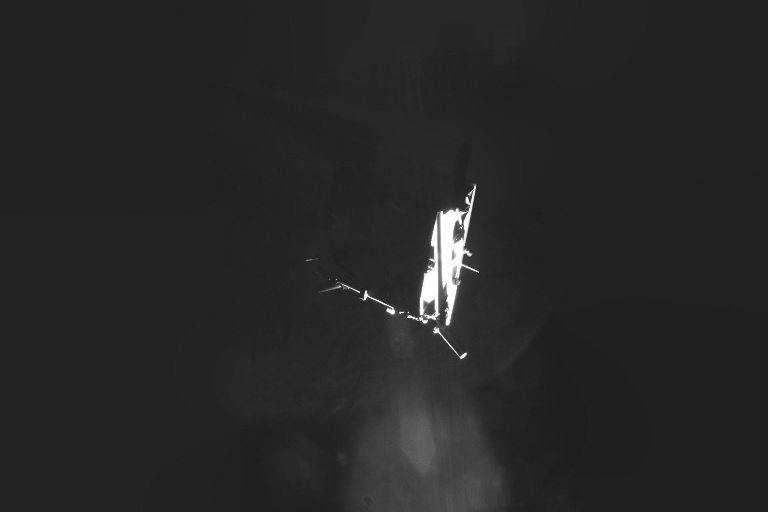

In [ ]:
cv2.imread('/content/speedplus_data/sunlamp/sunlamp/images_1920x1200_RGB/img000001.jpg')